<a href="https://colab.research.google.com/github/SpyHecker/Machine-Learning-SPPU/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The data
set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),
Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
Admitted is the target variable.

Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)Data
Set : https://www.kaggle.com/mohansacharya/graduate-admissions

The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.

Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if
necessary.

Perform data-preparation ( Train-Test Split)

C. Apply Machine Learning Algorithm

D. Evaluate Model.

In [ ]:
# Reading CSV file
import pandas as pd
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<Axes: xlabel='Chance of Admit ', ylabel='count'>

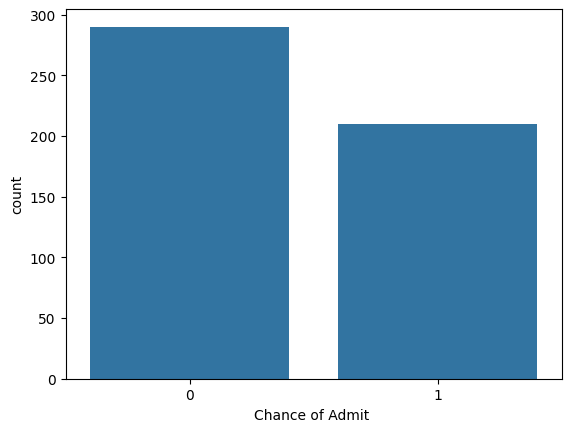

In [ ]:
# Data Preprocessing
from sklearn.preprocessing import Binarizer
import seaborn as sns
bi = Binarizer(threshold=0.75)
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']])
x = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']
y = y.astype(int)
sns.countplot(x = y)

In [ ]:
# Data Preparation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head()

,Actual,Predicted
90,0,0
254,1,1
283,1,1
445,1,1
461,0,0


0.96
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.95      0.93      0.94        44

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.96       125
weighted avg       0.96      0.96      0.96       125



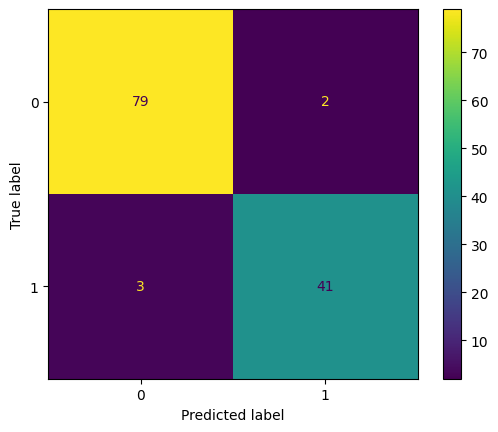

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

<Figure size 4000x3000 with 0 Axes>

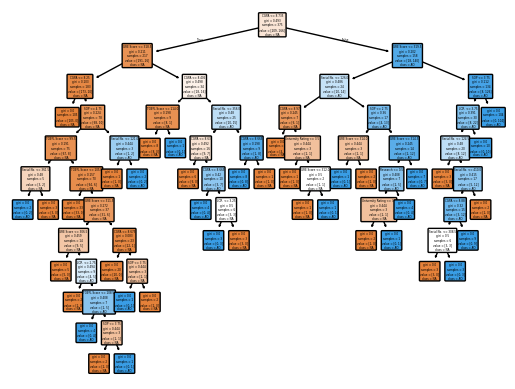

<Figure size 4000x3000 with 0 Axes>

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(classifier, fontsize=2 ,filled=True, rounded=True, feature_names=x.columns, class_names=['NA','AD'])
plt.figure(figsize=(40,30))